Lets first import all the dependencies. `PIL` is the standard python image library. `numpy` for numerical computations, `matplotlib` for plotting charts and `itertools` for producing permutations 

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import itertools

now well open the images, convert them to grayscale and then convert them to numpy arrays.

In [2]:
file_path = '/home/mohammad_14aug/ComputerVisionExercises/Exercise1'
img1 = Image.open(file_path + '/sample1.jpg').convert('L')
img2 = Image.open(file_path + '/sample2.jpg').convert('L')
img1 = np.asarray(img1).swapaxes(0, 1)
img2 = np.asarray(img2).swapaxes(0, 1)
print(type(img1))
print(np.shape(img1))

<class 'numpy.ndarray'>
(2560, 1440)


well use `matplotlib` to visualize our images and charts. lets take a look at our sample images.

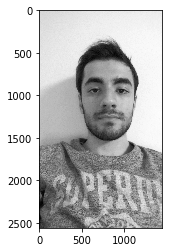

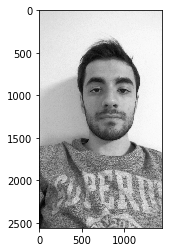

In [3]:
plt.imshow(img1, cmap = 'gray')
plt.show()
plt.imshow(img2, cmap = 'gray')
plt.show()

The images seem to be quite similar. Lets compare the pixels value by value to see how similar our images *really* are

# Exercise 1
**take two pictures from one scene and compare them pixel by pixel. are they exactly the same?**

In [4]:
dissimilar_pixels = 0
height, width = np.shape(img1)
for h in range(height):
    for w in range(width):
        if img1[h, w] != img2[h, w]:
            dissimilar_pixels += 1
print("ratio of dissimilar pixels to whole is: " + str(dissimilar_pixels / (height * width)))

ratio of dissimilar pixels to whole is: 0.92341796875


quite interesting isn't is! only $\%8$ of the pixels are exactly the same. even though the images look similar theyre actually very different! 

# Exercise 2
on the second exercise well produce all the possible images for a given histogram. 
the pixel values are: $ [0, 0, 1, 1, 1, 2] $ and the image dimensions are $2 \times 3 $.<br>
the `permutations` function from the `itertools` library will give us all the permutations of this array.
but some permutations will be repetitive, so lets add them all to a `Set` to get unique values.

In [5]:
histogram_values = [0, 0, 1, 1, 1, 2]
unique_values = {}
histogram_permutations = list(itertools.permutations(histogram_values))
for permutation in histogram_permutations:
    if unique_values.get(permutation) == None:
        unique_values[permutation] = 1
unique_permutations = list(unique_values.keys())
print("total number of unique permutations is: " + str(len(unique_permutations)))

total number of unique permutations is: 60


now lets simply plot all of the permutations! There should be a total 60 because: $\frac{6!}{2!3!} = 60$
*(there are six values. that give us a total of $6!$ permutations, the ones can be displaced in $3!$ different ways and the zeros in $2!$ ways. therefore we have the formula above)*

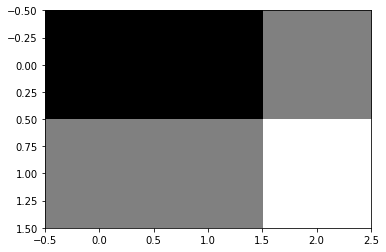

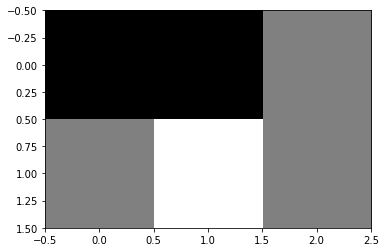

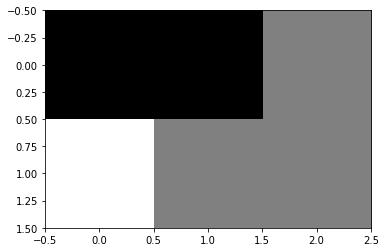

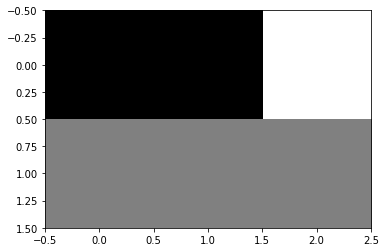

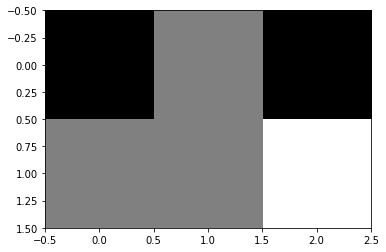

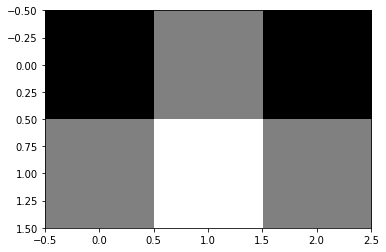

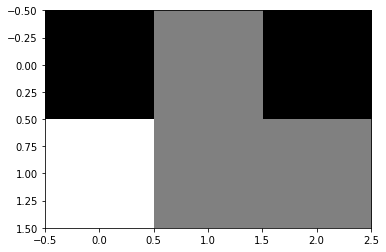

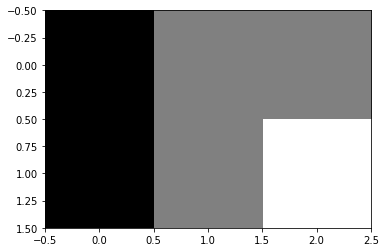

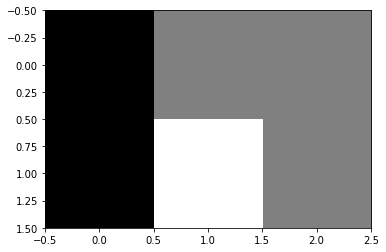

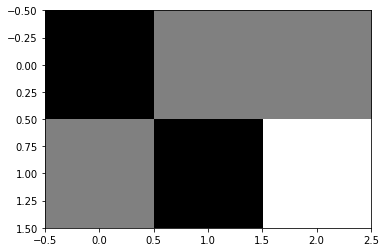

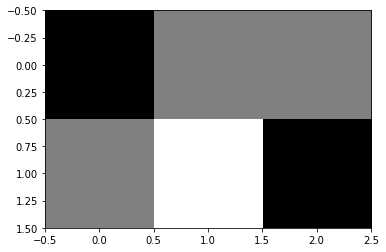

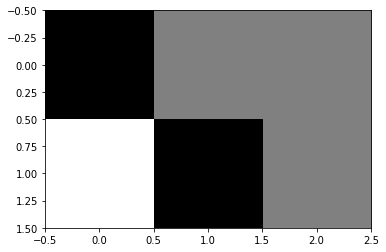

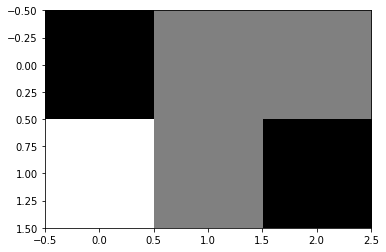

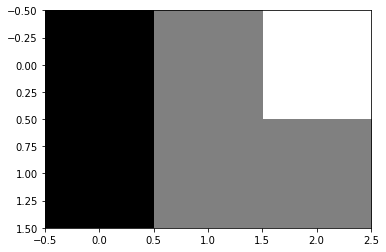

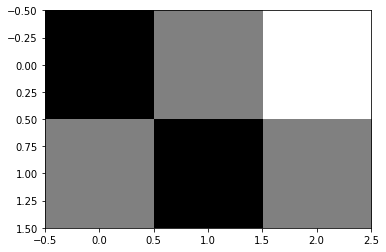

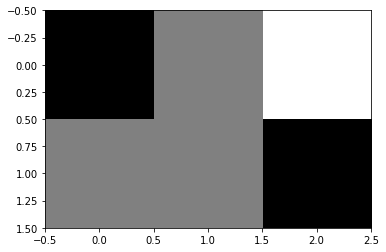

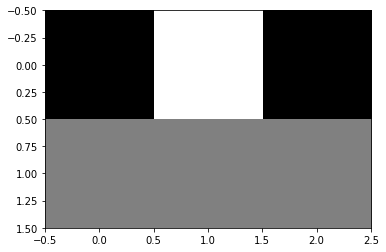

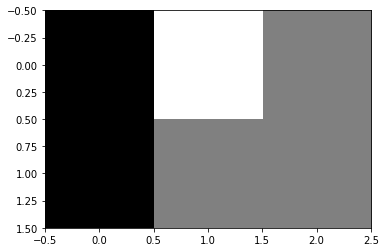

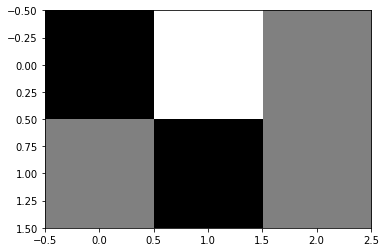

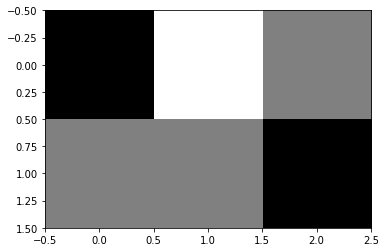

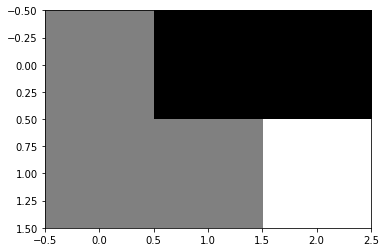

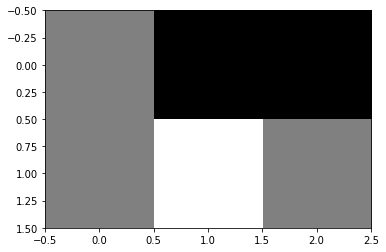

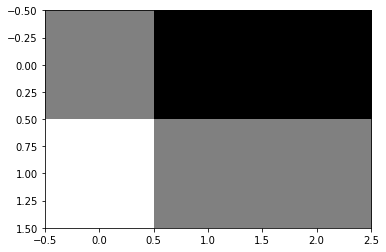

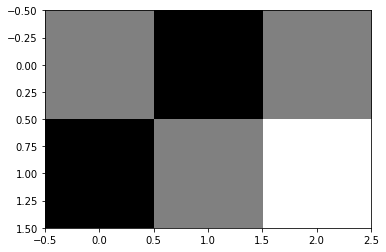

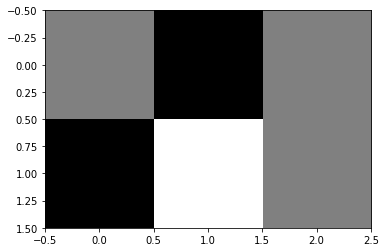

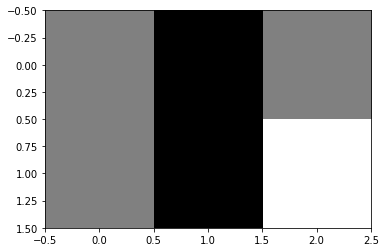

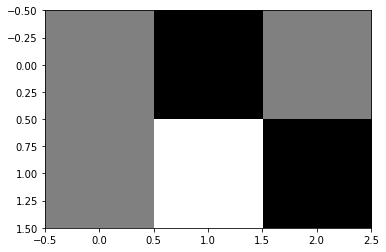

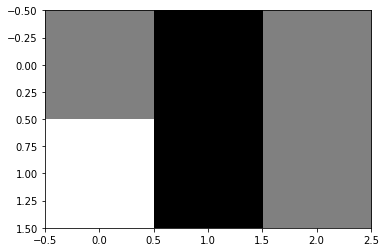

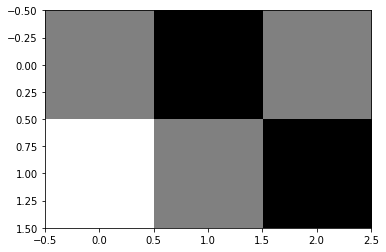

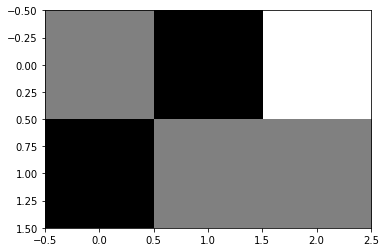

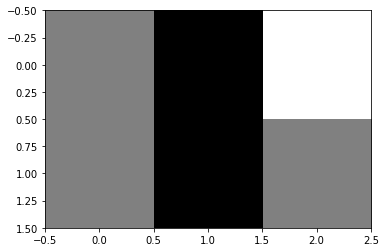

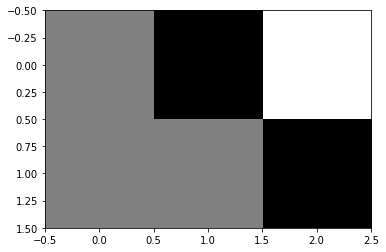

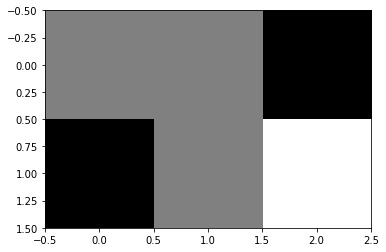

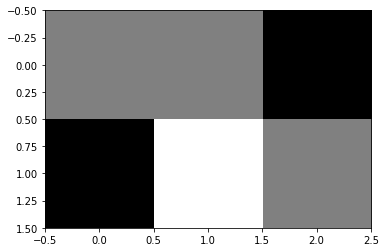

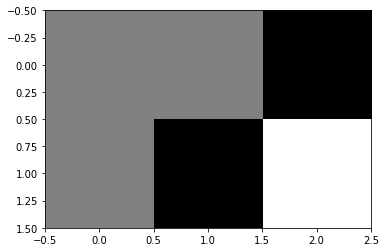

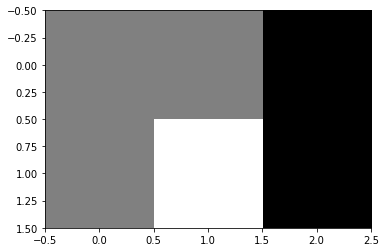

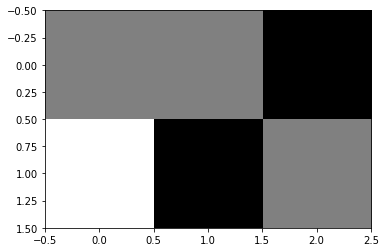

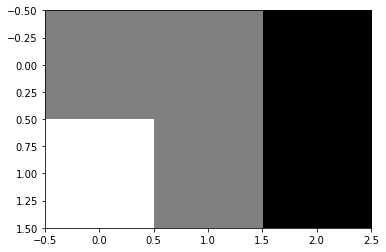

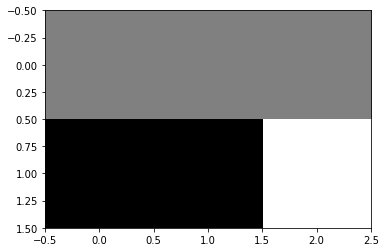

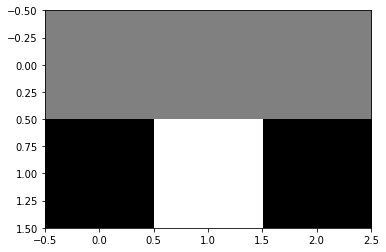

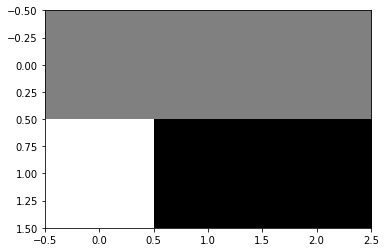

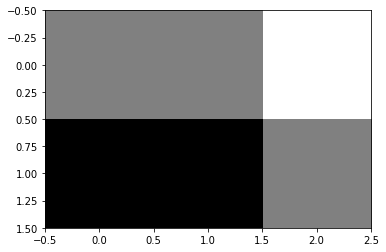

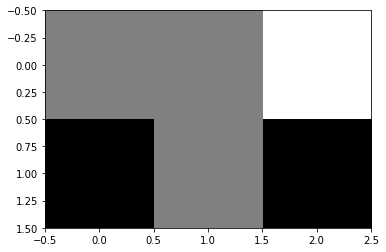

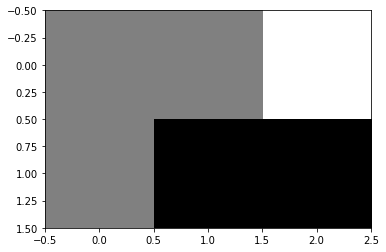

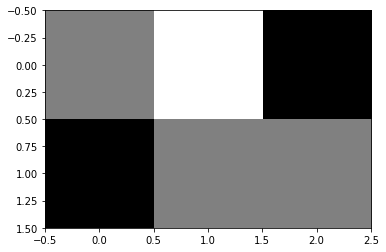

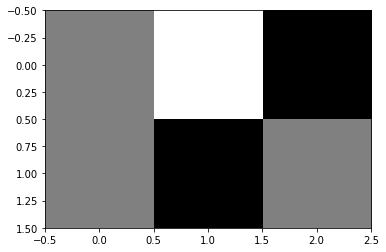

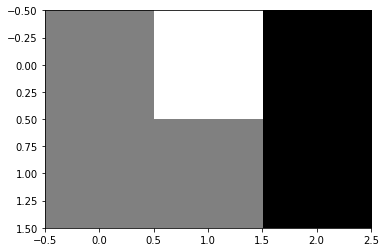

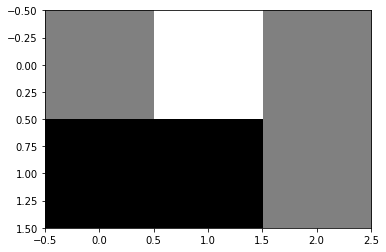

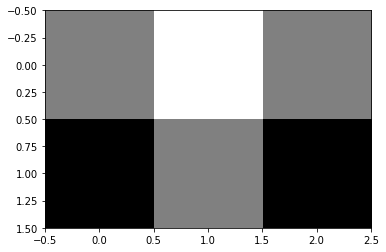

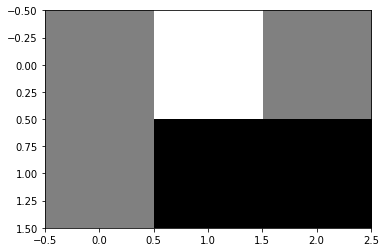

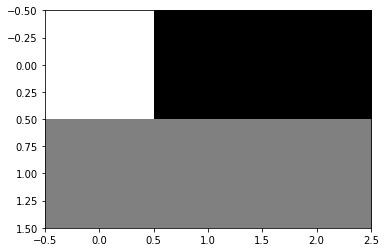

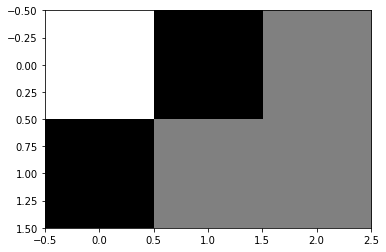

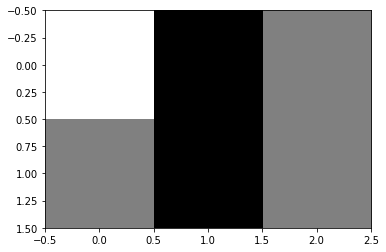

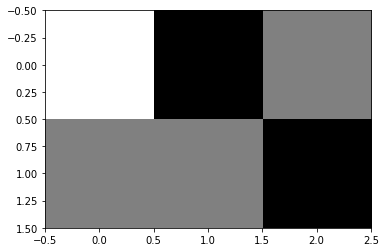

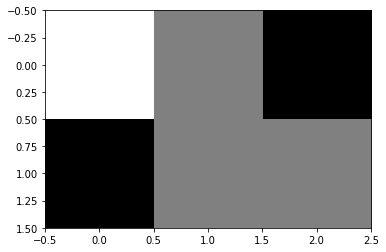

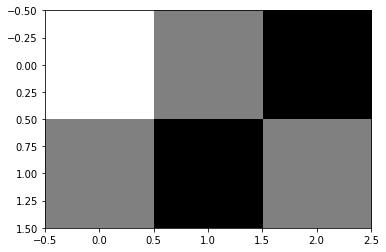

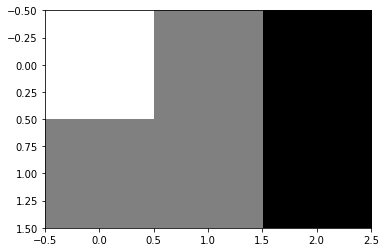

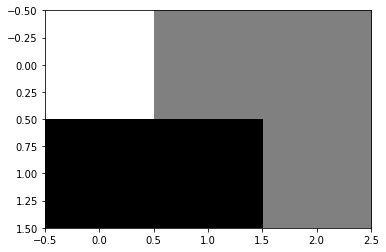

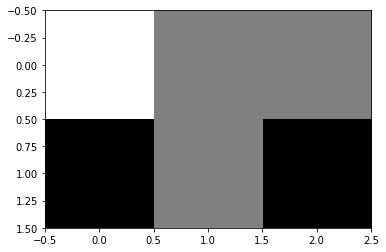

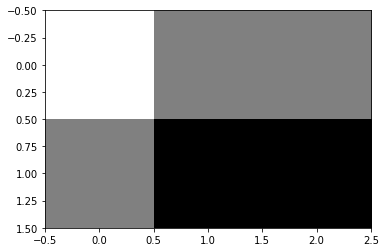

In [6]:
for permutation in unique_permutations:
    plt.imshow(np.reshape(permutation, [2, 3]) , cmap='gray')
    plt.show()

# Exercise 3
** plot the histogram of a grayscale image ** <br>
now lets take an image and plot the histogram. the algorithm is quite simple so i wont give much explanation

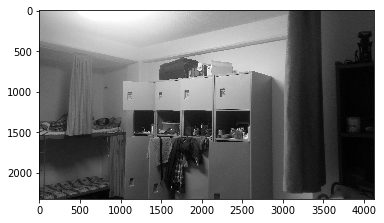

In [7]:
histogram = [0] * 256
img3 = np.asarray(Image.open(file_path + '/sample3.jpg').convert('L'))
plt.imshow(img3, cmap = 'gray')
height, width = np.shape(img3)
for h in range(height):
    for w in range(width):
        histogram[img3[h][w]] += (1 / (height * width))        

a chart can be plotted using the `plot` function from the `matplotlib.pyplot` library. the matplotlib library is actually an implementation of matlabs plotting functions in python.

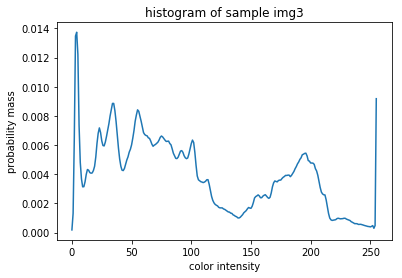

In [8]:
plt.plot(range(256), histogram)
plt.xlabel("color intensity")
plt.ylabel("probability mass")
plt.title("histogram of sample img3")
plt.show()
histogram_cdf = histogram

### Not part of exericse
I plotted the CDF(cumulative distribution function) of the histogram just out of curiousity :)

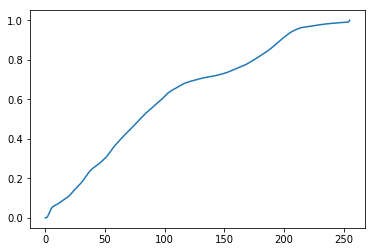

In [9]:
for i in range(1 , 256):
    histogram_cdf[i] += histogram_cdf[i - 1]
plt.plot(range(256), histogram_cdf)
plt.show()

And here i wrote two functions that compute and plot the histogram of any grayscale image respectively. lets try it on our first samples

In [10]:
def histogram(img1):
    histogram = [0] * 256
    height, width = np.shape(img1)
    for h in range(height):
        for w in range(width):
            histogram[img1[h][w]] += (1 / (height * width))
    return histogram

def plot_histogram(histogram):
    plt.title("histogram of the image")
    plt.xlabel("color intensity")
    plt.ylabel("probability mass")
    plt.plot(range(256), histogram)
    plt.show()

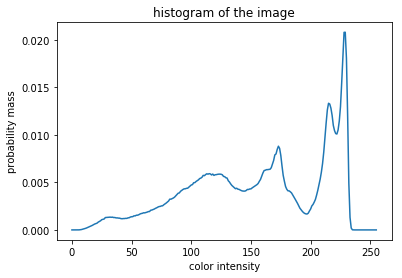

In [11]:
hist = histogram(img1)
plot_histogram(hist)

# Exercise 4
** figure out a useful algorith that converts any grayscale image to a 256*256 matrix** <br>
Now lets find a way to convert a sample image to a 256x256 matrix.
our pixels intensities are of type `uint8` which makes them vary between 0 and 255. the intensity distributions can be stored in a vector of size 256 which gives us the histogram. but what if we store them in a vector of size 256? lets map the intensity values to a range between 0 and 255 and then store each of them as a one hot vector. 


In [12]:
width, height = np.shape(img1)
maximum_intensity = max(hist) * height * width
print(maximum_intensity)

76731.99999998073


lets multiply each value of hist by 256 and store it as one hot

In [13]:
hist = np.multiply(hist, 256)

In [14]:
print(max(hist))

5.328611111109773


In [15]:
hist = hist.astype(int)
print(hist[0 : 256])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 3 3 3 3 3 2 2 2
 2 2 2 3 3 4 5 5 4 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


this function will convert our vector to a one hot matrix

In [16]:
def one_hot(vector, classes= 10):
    length= len(vector)
    output= np.zeros((length, classes))
    output[range(length), vector]= 1
    return output    

In [17]:
hist_256x256 = one_hot(hist, classes = 256)

Now let me wrap all i have done in a function to make it clear

In [18]:
def hist_to_256x256(hist):
    hist = np.multiply(hist, 256)
    hist = hist.astype(int)
    hist_256x256 = one_hot(hist, classes = 256)
    return hist_256x256

In [19]:
hist = histogram(img1)
hist_256_256=hist_to_256x256(hist)

In [20]:
print(np.shape(hist_256_256))

(256, 256)


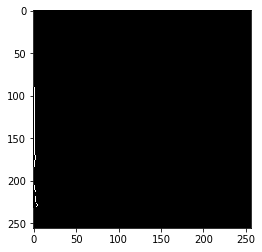

In [21]:
plt.imshow(hist_256_256, cmap = 'gray')
plt.show()

As can be seen, the matrix is very sparse, and the colors are quite fairly distributed along the image because most color intensities have a value of 1. lets try this function on img3 and see what the results look like over there

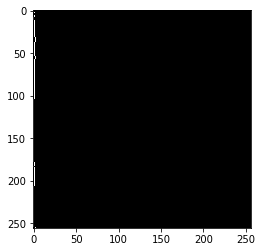

In [22]:
hist = histogram(img3)
hist_256_256 = hist_to_256x256(hist)
plt.imshow(hist_256_256, cmap = 'gray')
plt.show()